# Species Data Set - Part A

## Problem Statement:-

1. Plot a histogram for "the count of all the rodents over the years" TODO: Add some interesting groupby type

2. PLot a bar graph showing the distribution of rodents discovered in the winter season.(from dec 1 to feb 28th)

3. Plot the count of female and male species discovered over the years (Refer to Stacked Bar Charts)

## Files Required:-

1. Species.csv
2. Surveys.csv

## Importing Packages

In [10]:
#Importing Various packages --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [11]:
#Plots to be forced 'inline'
%matplotlib inline

## Reading from CSV Files

In [12]:
csv_file_1 = pd.read_csv('species.csv')
csv_file_2 = pd.read_csv('surveys.csv')

## Final Table

In [13]:
# Merged the two Dataframes into one DataFrame
Final_table = pd.merge(csv_file_1, csv_file_2, on='species_id')

In [14]:
Final_table.shape

(34786, 12)



.
## PROBLEM STATEMENT 1.0

#### Plot a histogram for "the count of all the rodents over the years"

In [15]:
# DataFrame filtered, containing Rodent and Year
data_with_rodent_year = Final_table.loc[ Final_table['taxa'] == 'Rodent', 'year']

#### Histogram - No. of Rodents Vs Year

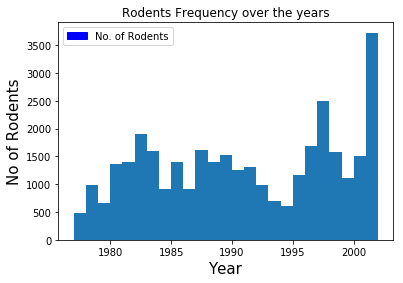

In [16]:
#Histogram Legends --
plt.title("Rodents Frequency over the years")
plt.xlabel("Year", fontsize=15)
plt.ylabel("No of Rodents", fontsize=15)
#Adding Blue colour 
blue_patch = mpatches.Patch(color='blue', label='No. of Rodents')
plt.legend(handles = [blue_patch])

plt.hist(data_with_rodent_year, bins=25)
plt.show()

## PROBLEM STATEMENT 1.1

#### Plot a bar graph showing the distribution of rodents discovered in the winter season ( From Dec 1 to Feb 28th )

In [17]:
# DataFrame containing Rodent, Day, Month and year
data_with_rodent_DMY = Final_table[['taxa','month','day','year']]

#### Condition for Winter

In [18]:
# Condition for Winter Season (1st Dec TO 28th Feb) --
winter_months = data_with_rodent_DMY[(data_with_rodent_DMY.month == 1) | 
                                     ((data_with_rodent_DMY.month == 2) & (data_with_rodent_DMY.day <= 28)) | 
                                     (data_with_rodent_DMY.month == 12)]

#Only for Rodents --
data_with_rodent_Winter = winter_months[winter_months.taxa == 'Rodent']

#### Bar Graph can be drawn for -  No. of Rodents : 
1. per month wise.
2. per year wise


#### Bar Graph - No. of Rodents in Winter Season Vs Month

In [19]:
# Plot containing Year, month, day and Rodent
#my_bar = data_with_rodent_inWinter.groupby(['month']).taxa.count()

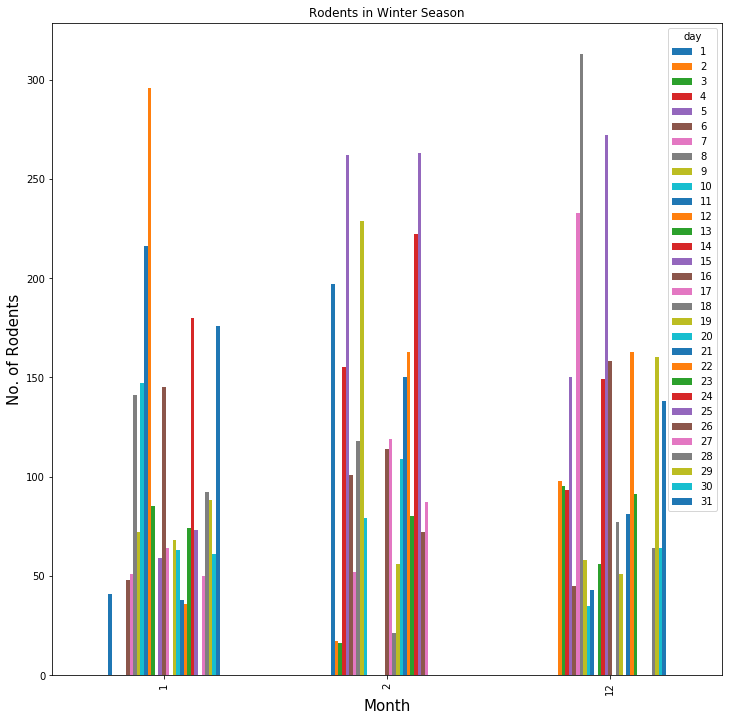

In [20]:
#Plotting a Bar Graph (By Month)--
bar_plot_R_M = pd.crosstab(data_with_rodent_Winter.month, data_with_rodent_Winter.day).plot(kind='bar', legend=True, 
                                                                                        title="Rodents in Winter Season", 
                                                                                        figsize=(12,12))
bar_plot_R_M.set_xlabel("Month", fontsize=15)
bar_plot_R_M.set_ylabel("No. of Rodents", fontsize=15)


####  Bar graph - No. of Rodents in Winter season Vs Year

In [21]:
# Storing Value Count of Rodents per year (1977-2002) in Winter Season only
data_with_rodent_Winter_year = data_with_rodent_Winter.year.value_counts()

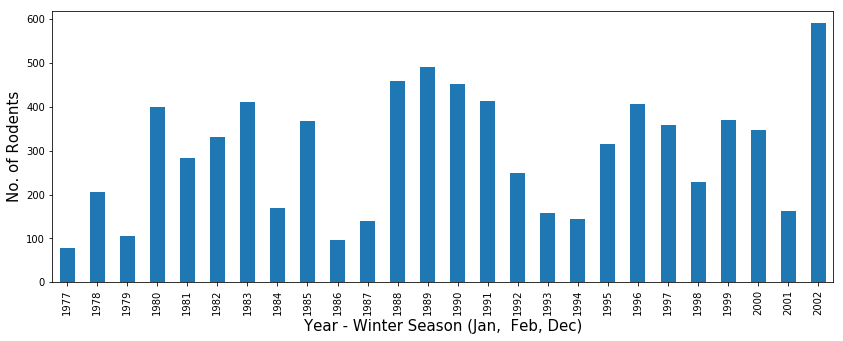

In [22]:
# Plotting a Bar graph
bar_plot_R_Y = data_with_rodent_Winter_year.sort_index().plot(kind='bar', figsize=(14,5))

bar_plot_R_Y.set_xlabel("Year - Winter Season (Jan,  Feb, Dec)", fontsize=15)
bar_plot_R_Y.set_ylabel("No. of Rodents", fontsize=15)

.
## PROBLEM STATEMENT 1.3

#### Plot the count of female and male species discovered over the years (Stacked Bar Charts)

In [23]:
# DataFrame containing Gender and Year
data_with_gender_year = Final_table[['sex','year']].sort_values('year')

##### Using Crosstab

In [26]:
#Crosstab Feature of Pandas--
data_with_gender_as_year_index = pd.crosstab(data_with_gender_year.year, data_with_gender_year.sex)
data_with_gender_as_year_index

sex,F,M
year,,
1977,204,214
1978,503,433
1979,327,324
1980,605,727
1981,631,745
1982,823,1027
1983,771,797
1984,445,443
1985,636,716


### Stacked Bar Chart - Species based on Gender Vs Year

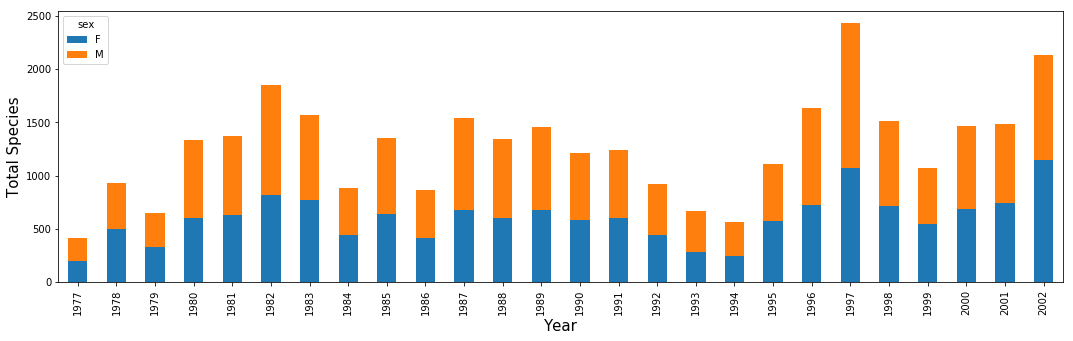

In [27]:
# Bar Chart Legends --
bar_plot_Gender_Y = data_with_gender_as_year_index.plot(kind='bar', stacked=True, figsize=(18,5))

bar_plot_Gender_Y.set_xlabel("Year", fontsize=15)
bar_plot_Gender_Y.set_ylabel("Total Species", fontsize=15)

## Alternative Method 

##### Without using 'crosstab'

In [ ]:
# Formed two New Series containg Male and Female counts :-
male = data_with_gender_year[data_with_gender_year.sex == 'M'].year.value_counts()
female = data_with_gender_year[data_with_gender_year.sex == 'F'].year.value_counts()

# Adding the two New Series formed into a DataFrame --
data_with_TotalM_TotalF_year = pd.DataFrame({'Total_M': male, 'Total_F':female})

### Stacked Bar Chart

In [ ]:
bar_plot_TM_TF_Y = data_with_TotalM_TotalF_year.plot(kind='bar', stacked='True', figsize=(18,5))

bar_plot_TM_TF_Y.set_xlabel("Year", fontsize=15)
bar_plot_TM_TF_Y.set_ylabel("Total Species", fontsize=15)